# `hfsolver` examples

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
rcpars = {'figure.dpi': 110,
          'axes.grid': True,
         }
plt.rcParams.update(rcpars)

## 1) Calculate the density in a range of $\nu$ using `solver`

In [4]:
from hfsolver import solver

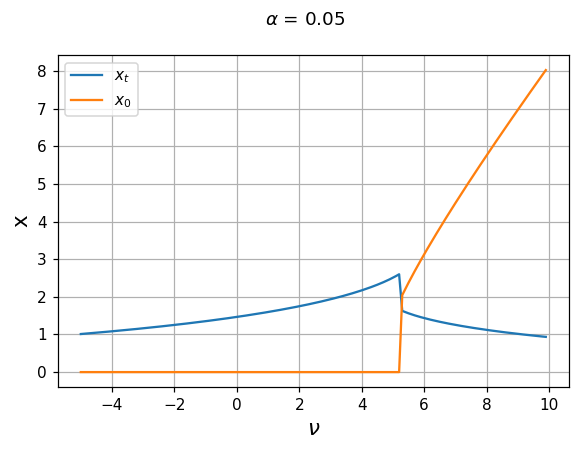

In [5]:
nus = np.arange(-5, 10, .1)
x_t = np.empty(nus.shape)
x_c = np.empty(nus.shape)

alpha = 0.05
for j, nu in enumerate(nus):
#     print(nu)
    x_t[j], x_c[j] = solver(nu, alpha)

fig, ax = plt.subplots()

fig.suptitle('$\\alpha$ = %g'%alpha)

ax.plot(nus, x_t, label='$x_t$')
ax.plot(nus, x_c, label='$x_0$')

ax.set_xlabel('$\\nu$', fontsize=14)
ax.set_ylabel('x', fontsize=14)
ax.legend()

## 2) Calculate the distribution in a harmonic potential

In [6]:
from hfsolver.physics import *
from hfsolver.physics import _alpha, _nu

N atomi: 6.7819 milioni (6.78189)
Fraz cond globale: 0.669


Text(0,0.5,'n [at/m3]')

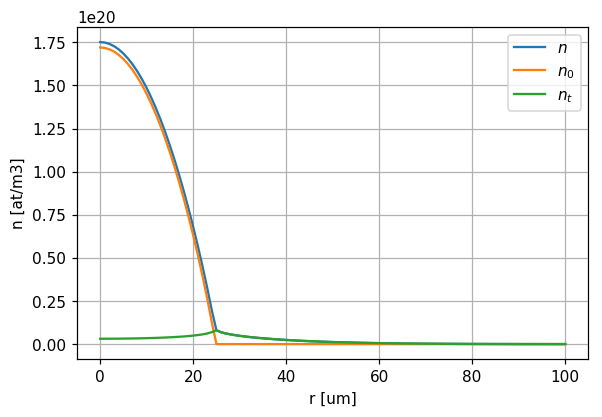

In [7]:
mu0 = 130e-9 * kB
T = 300e-9

omega_ho = 2*pi * 59.3
dr = 1e-6

fun_n, fun_n0, mu_radial, r, alpha = solver_harmonic_trap(mu0, T, omega_ho, dr=dr)


n = fun_n(mu_radial)
n0 = fun_n0(mu_radial)

cond_frac = n0/n
N = 4*pi * trapz(n*r**2, r)
N0 = 4*pi * trapz(n0*r**2, r)

N2 = integrate_N_harmonic_trap(mu0, omega_ho, n, mu_radial)

print('N atomi: %g milioni (%g)'%(N*1e-6, N2*1e-6))
print('Fraz cond globale: %.3f'%(N0/N))

fig, ax = plt.subplots()

ax.plot(r/dr,n, label='$n$')
ax.plot(r/dr,n0, label='$n_0$')
ax.plot(r/dr,n - n0, label='$n_t$')

# ax.set_xlim(xmax=55)
ax.legend()

ax.set_xlabel('r [um]')
ax.set_ylabel('n [at/m3]')

## 3) Reasonably physical values for $\alpha$ and $\nu$

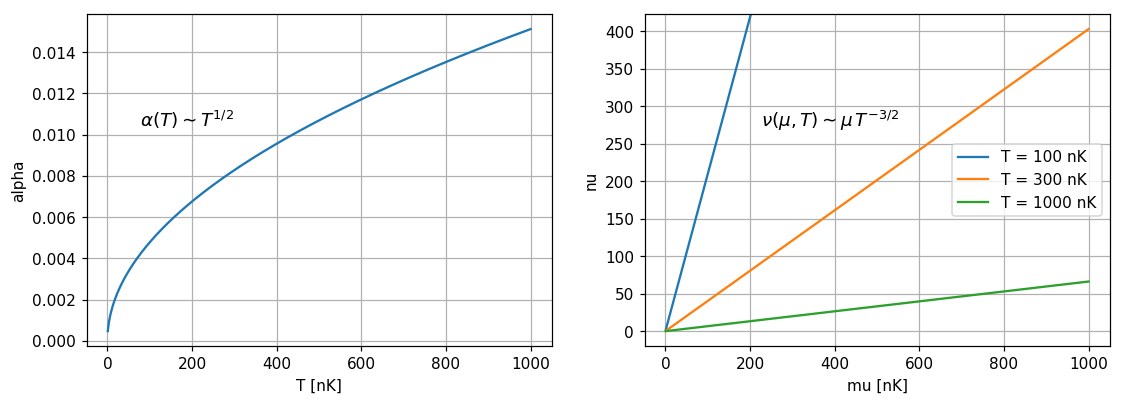

In [8]:
T_range = np.logspace(-9, -6, 1000)

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(12,4))


ax0.plot(T_range*1e9, _alpha(T_range))
ax0.annotate('$\\alpha(T) \sim T^{1/2}$', xy=(0.115, 0.66), xycoords='axes fraction', fontsize=12)

ax0.set_xlabel('T [nK]')
ax0.set_ylabel('alpha')
# $\nu(\mu, T)$

mu_range = np.logspace(-9, -6, 1000)

for temp in (100, 300, 1000):
    nu_plot = _nu(mu_range*kB, temp*1e-9)
    ax1.plot(mu_range*1e9, nu_plot, label='T = %g nK'%temp)

ax1.set_ylim((-20.05, 422.674))
ax1.annotate('$\\nu(\mu, T) \sim \mu\,T^{-3/2}$', xy=(0.25, 0.66), xycoords='axes fraction', fontsize=12)
ax1.set_xlabel('mu [nK]')
ax1.set_ylabel('nu')

ax1.legend()

